In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing, linear_model
from sklearn.model_selection import train_test_split


In [169]:
df1 = pd.read_csv("/content/drive/MyDrive/CSE428/LAB6/dataset1.csv")

In [170]:
X= df1[['x1']].values

In [171]:
print(X.shape)#(Number of samples ,number of features)


(150, 1)


In [172]:
y =df1['y'].values#Number of samples

In [173]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2,random_state = 100)

In [174]:
print(X_train.shape)
print(y_train.shape)

(120, 1)
(120,)


(0.0, 1.0, 0.0, 1.0)

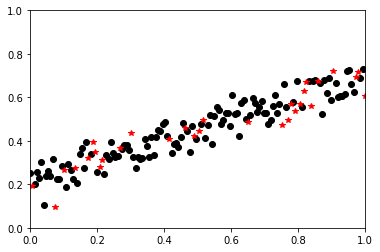

In [175]:
plt.plot(X_train, y_train, "ko")
plt.plot(X_test,y_test, "r*")
plt.axis([0, 1, 0, 1])

In [176]:
model = linear_model.LinearRegression()

In [177]:
model.fit(X_train, y_train)

LinearRegression()

In [178]:
y_predict = model.predict(X_test)

In [179]:
theta0 = model.intercept_
theta1 = model.coef_
print(theta0, theta1)

0.21340233163380795 [0.48267886]


Linear Regression Model Visualization

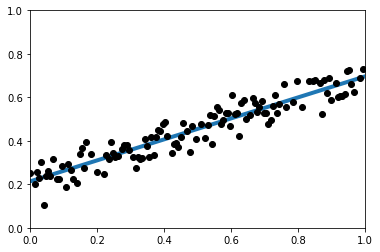

In [180]:
xx = np.linspace(0, 1,100)
yy = theta0 + theta1* xx # y= mx + c
plt.plot(xx, yy, lw = 4)
plt.plot(X_train, y_train,'ko')
plt.axis([0, 1, 0, 1])
plt.show()

Loss Calculation

In [181]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)

Train loss : 0.0024786147642406795
Test loss : 0.003112096227732804


Feature Engineering


In [182]:
df2 = pd.read_csv("/content/drive/MyDrive/CSE428/LAB6/dataset2.csv")

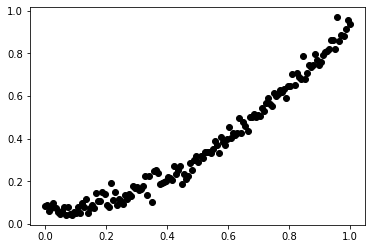

In [183]:
X = df2[['x1']].values
y = df2['y'].values
plt.plot(X, y, 'ko')

In [184]:
df2['x1^2']  =df2['x1']**2
df2.head()

,x1,y,x1^2
0,0.000000,0.081242,0.000000
1,0.006711,0.087722,0.000045
2,0.013423,0.057933,0.000180
3,0.020134,0.073257,0.000405
4,0.026846,0.097313,0.000721


In [185]:
X = df2[['x1','x1^2']].values
y = df2['y'].values
print(X.shape)
print(y.shape)

(150, 2)
(150,)


In [186]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)


In [187]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

theta0 = model.intercept_
theta1 = model.coef_
print(theta0, theta1)

0.053496397613713054 [0.09931488 0.79876521]


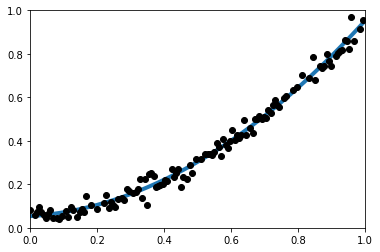

In [188]:
xx = np.linspace(0, 1,100)
yy = theta0 + theta1[0]* xx + theta1[1] *(xx**2) # y= mx + c
plt.plot(xx, yy, lw = 4)
plt.plot(X_train[:, 0], y_train,'ko')
plt.axis([0, 1, 0, 1])
plt.show()

In [189]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)

Train loss : 0.0007718495336839056
Test loss : 0.0009814492721656144


In [190]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [191]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [192]:
X = data['data']
y = data['target']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [193]:
print(data['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [194]:
df = pd.DataFrame(data['data'], columns = data['feature_names'])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [195]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [196]:
X_norm = preprocessing.minmax_scale(X)
df = pd.DataFrame(X_norm, columns = data['feature_names'])
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338


In [197]:
X_train, X_test,y_train, y_test = train_test_split(X_norm, y, test_size = 0.2, random_state = 100)

In [198]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [199]:
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)


Train loss : 21.649376911833606
Test loss : 23.616994100563645


In [200]:
df = pd.DataFrame(X_norm, columns = data['feature_names'])
for col in df.columns:
  df[col + '2'] = df[col]**2
  

In [201]:
X= df.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [202]:
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)


Train loss : 14.155103098521689
Test loss : 16.536859660135544


In [203]:
df = pd.DataFrame(X_norm, columns = data['feature_names'])
for col in df.columns:
  df[col + '2'] = df[col]**2
  df[col + '3'] = df[col]**3

In [204]:
X= df.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)

Train loss : 12.992408129234372
Test loss : 17.043797652223486


In [205]:
df = pd.DataFrame(X_norm, columns = data['feature_names'])
for col in df.columns:
  df[col + '2'] = df[col]**2
  df[col + '3'] = df[col]**3
  df[col + '4'] = df[col]**4

In [206]:
X= df.values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
mse_train = np.mean((y_train - model.predict(X_train))**2)
print("Train loss :", mse_train)
mse_test = np.mean((y_test - y_predict)**2)
print('Test loss :',mse_test)

Train loss : 11.2907742373569
Test loss : 18.34629266924616
